In [9]:
# Import packages
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene
!pip install scikit_posthocs
!pip install researchpy
!pip install pingouin
import researchpy as rp
from scipy.stats import anderson
from statsmodels.graphics.factorplots import interaction_plot

In [2]:
# load dataset
df = pd.read_csv('2178 Midterm Dataset.csv')

In [3]:
display(df)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [4]:
#Data Cleaning
columns_to_extract = columns_to_extract = ['Sex', 'StripSearch', 'Youth_at_arrest__under_18_years','Arrest_Month', 'PersonID', 'Perceived_Race']
working_df = df.loc[:, columns_to_extract]
#divide the age group
working_df['Youth_at_arrest__under_18_years'] = working_df['Youth_at_arrest__under_18_years'].replace(['Not a youth'], 'Adult')
working_df['Youth_at_arrest__under_18_years'] = working_df['Youth_at_arrest__under_18_years'].replace(['Youth (aged 17 and younger)'], 'Youth')
working_df['Youth_at_arrest__under_18_years'] = working_df['Youth_at_arrest__under_18_years'].replace(['Youth (aged 17 years and under)'], 'Youth')
#divide the months to quarters
working_df['Arrest_Month'] = working_df['Arrest_Month'].replace(['Jan-Mar'], 'First Quarter')
working_df['Arrest_Month'] = working_df['Arrest_Month'].replace(['July-Sept'], 'Third Quarter')
working_df['Arrest_Month'] = working_df['Arrest_Month'].replace([ 'Apr-June'], 'Second Quarter')
working_df['Arrest_Month'] = working_df['Arrest_Month'].replace(['Oct-Dec'], 'Fourth Quarter')
working_df['half_year'] = working_df['Arrest_Month']
#create a new column and divide the year into first half and second half
working_df['half_year'] = working_df['half_year'].replace(['First Quarter', 'Second Quarter'], 'first_half')
working_df['half_year'] = working_df['half_year'].replace(['Third Quarter', 'Fourth Quarter'], 'second_half')
#create total_arrest col
working_df['total_arrest'] = working_df.groupby('PersonID').PersonID.transform('count')
print(working_df)

      Sex  StripSearch Youth_at_arrest__under_18_years    Arrest_Month  \
0       M            0                           Adult   Third Quarter   
1       M            0                           Adult   Third Quarter   
2       M            0                           Adult  Fourth Quarter   
3       M            0                           Adult   First Quarter   
4       M            0                           Adult   First Quarter   
...    ..          ...                             ...             ...   
65271   F            0                           Adult  Fourth Quarter   
65272   M            0                           Adult  Fourth Quarter   
65273   F            0                           Adult  Fourth Quarter   
65274   M            0                           Youth  Fourth Quarter   
65275   M            0                           Adult  Fourth Quarter   

       PersonID     Perceived_Race    half_year  total_arrest  
0        326622              White  second_half

(65276, 8)
Sex                                object
StripSearch                         int64
Youth_at_arrest__under_18_years    object
Arrest_Month                       object
PersonID                            int64
Perceived_Race                     object
half_year                          object
total_arrest                        int64
dtype: object
count    65276.000000
mean         4.133096
std          5.402883
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         54.000000
Name: total_arrest, dtype: float64


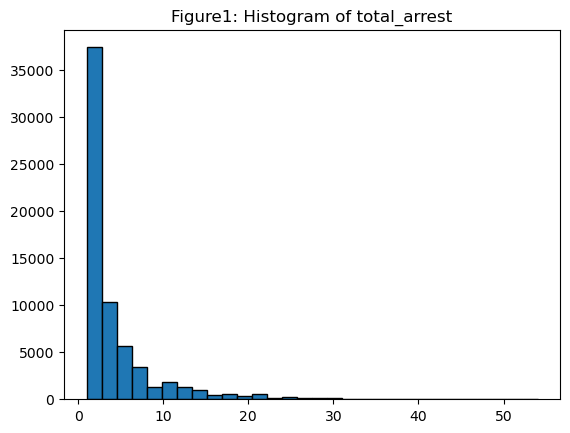

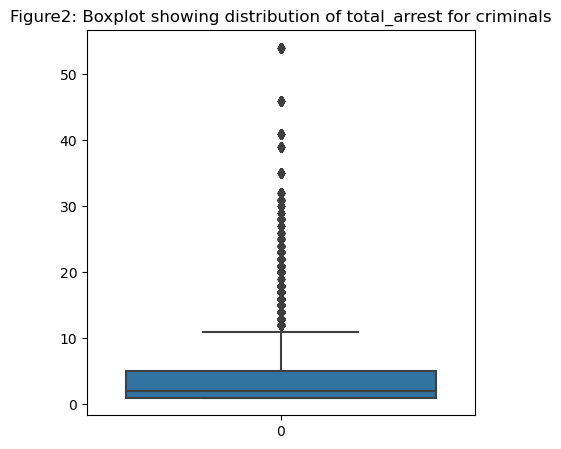

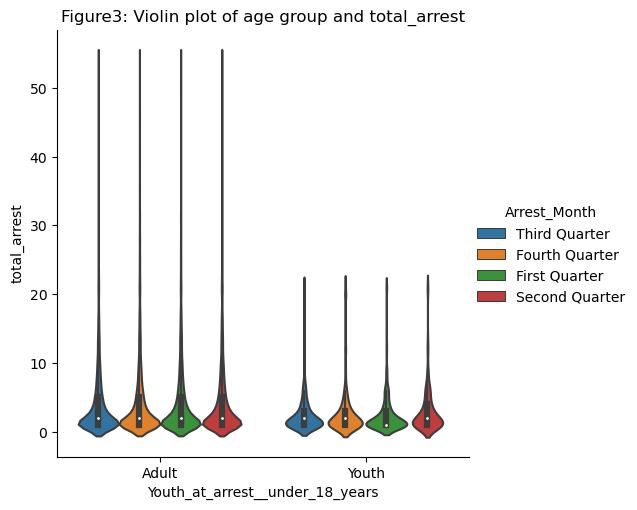

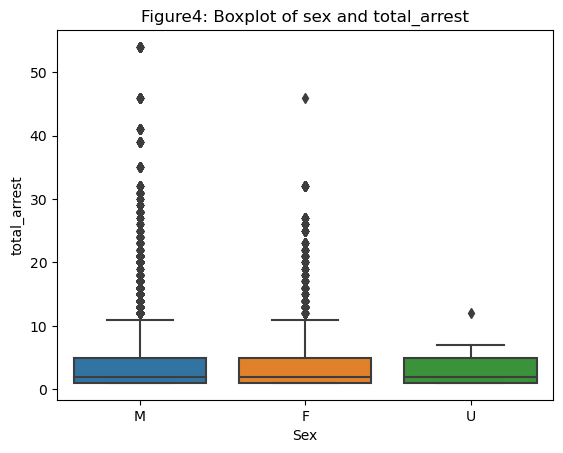

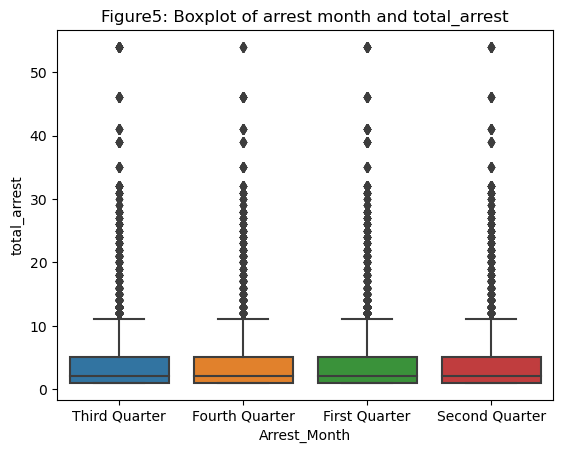

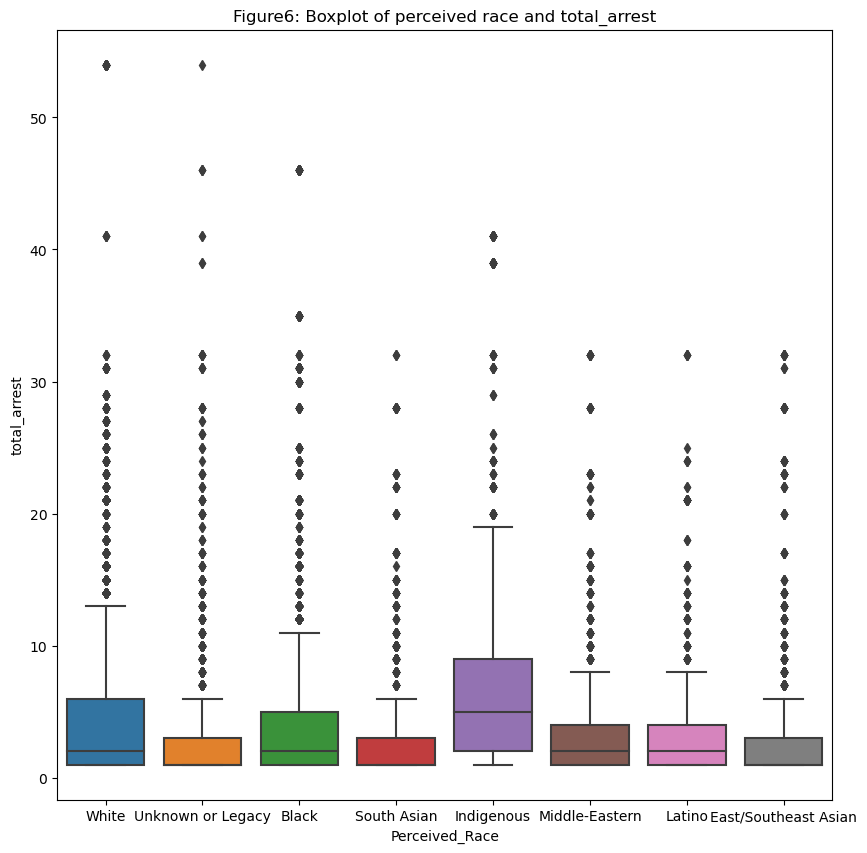

statistic: 20664.224421499937
critical values: [0.576 0.656 0.787 0.918 1.092]
significance levels: [15.  10.   5.   2.5  1. ]
statistic: 7688.853958205262
critical values: [0.576 0.656 0.787 0.918 1.092]
significance levels: [15.  10.   5.   2.5  1. ]


In [5]:
##EDA
working_df.head()
print(working_df.shape)
print(working_df.dtypes)
#the descriptive statistic of total arrest
total_arrest = working_df["total_arrest"].describe()
print(total_arrest)
#plot the distribution of the total_arrest col
plt.hist(working_df["total_arrest"], bins=30, edgecolor='black')
plt.title('Figure1: Histogram of total_arrest')
plt.show()
plt.figure(figsize= (5,5))
sns.boxplot(data = working_df['total_arrest'])
plt.title('Figure2: Boxplot showing distribution of total_arrest for criminals')
plt.xlabel('')
plt.ylabel('')
plt.show()


#violin plot of youth and total arrest
sns.catplot(data=working_df, kind="violin", x="Youth_at_arrest__under_18_years", y="total_arrest", hue="Arrest_Month")
plt.title('Figure3: Violin plot of age group and total_arrest')
plt.show()
#box plot of sex and total arrest
sns.boxplot(data = working_df, x = 'Sex', y = 'total_arrest')
plt.title('Figure4: Boxplot of sex and total_arrest')
plt.show()
#box plot of Arrest_month and total arrest
sns.boxplot(data = working_df, x = 'Arrest_Month', y = 'total_arrest')
plt.title('Figure5: Boxplot of arrest month and total_arrest')
plt.show()
#box plot of Perceived_race and total arrest
plt.figure(figsize= (10,10))
sns.boxplot(data = working_df, x = 'Perceived_Race', y = 'total_arrest')
plt.title('Figure6: Boxplot of perceived race and total_arrest')
plt.show()

#Normality Assumption Check using anderson darling test On StripSearch
ad1 = anderson(working_df["StripSearch"])
# Print results
print("statistic:", ad1.statistic)
print("critical values:", ad1.critical_values)
print("significance levels:", ad1.significance_level)


#perform anderson darling test on Total Arrest
ad2 = anderson(working_df["total_arrest"])
# Print results
print("statistic:", ad2.statistic)
print("critical values:", ad2.critical_values)
print("significance levels:", ad2.significance_level)





In [6]:
# RQ1 t-test
# Calculate the proportion of individuals in each group who were strip searched
strip_search_prop = working_df.groupby("Sex")["StripSearch"].mean()
# Perform the Welch t-test
t_stat, p_value = ttest_ind(working_df[working_df["Sex"] == "M"]["StripSearch"], working_df[working_df["Sex"] == "F"]["StripSearch"], equal_var=False)
# Print the results
print("Proportion of males strip searched:", strip_search_prop["M"])
print("Proportion of females strip searched:", strip_search_prop["F"])
print("Welch t-test results for RQ2: t = {:.3f}, p = {:.3f}".format(t_stat, p_value))
#perform equal variance test
test_statistic, p_value = levene(working_df[working_df["Sex"] == "M"]["StripSearch"], working_df[working_df["Sex"] == "F"]["StripSearch"])
print("Levene test statistic:", test_statistic)
print("p-value:", p_value)


# RQ1 One-way ANOVA
f_stat, p = f_oneway(working_df[working_df["Sex"] == "M"]["StripSearch"], working_df[working_df["Sex"] == "F"]["StripSearch"], working_df[working_df["Sex"] == "U"]["StripSearch"])
# print the results
print("One-way ANOVA results for RQ2: f = {:.3f}, p = {:.3f}".format(f_stat, p))

# RQ1 one way anova post hoc test
tukey_results = pairwise_tukeyhsd(working_df['StripSearch'], working_df['Sex'])
# Print the results
print(tukey_results)

# Homogeneity of Variance Assumption check for one way anova
grouped_data = working_df.groupby('Sex')['StripSearch'].apply(list)

statistic, p_value = levene(*grouped_data)

if p_value < 0.05:
    print('The assumption of homogeneity of variance is violated.')
else:
    print('The assumption of homogeneity of variance is met.')



Proportion of males strip searched: 0.12379867046533713
Proportion of females strip searched: 0.10168819846239201
Welch t-test results for RQ2: t = 7.250, p = 0.000
Levene test statistic: 47.313418379487395
p-value: 6.103930543749964e-12
One-way ANOVA results for RQ2: f = 24.271, p = 0.000
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     F      M   0.0221    0.0  0.0146 0.0296   True
     F      U  -0.1017 0.6147 -0.3551 0.1517  False
     M      U  -0.1238 0.4862 -0.3772 0.1296  False
---------------------------------------------------
The assumption of homogeneity of variance is violated.


Welch t-test results for youth and total arrest: t = -27.218, p = 0.000
Levene test statistic: 233.0762983507244
p-value: 1.5681617551593496e-52
                                                    sum_sq       df  \
Youth_at_arrest__under_18_years               7.360794e+03      1.0   
Arrest_Month                                  2.701389e+02      3.0   
Youth_at_arrest__under_18_years:Arrest_Month  8.609193e+01      3.0   
Residual                                      1.897717e+06  65268.0   

                                                       F        PR(>F)  
Youth_at_arrest__under_18_years               253.159078  6.806541e-57  
Arrest_Month                                    3.096954  2.567045e-02  
Youth_at_arrest__under_18_years:Arrest_Month    0.986984  3.976919e-01  
Residual                                             NaN           NaN  
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
------------------------------

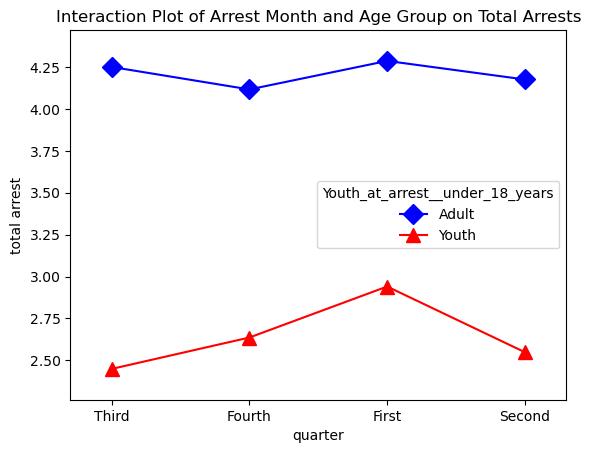

<Figure size 1000x1000 with 0 Axes>

In [30]:
# RQ2 t-test youth and total_arrest
t_stat2, p_value2 = ttest_ind(working_df[working_df["Youth_at_arrest__under_18_years"] == "Youth"]["total_arrest"], working_df[working_df["Youth_at_arrest__under_18_years"] == "Adult"]["total_arrest"], equal_var=False)
print("Welch t-test results for youth and total arrest: t = {:.3f}, p = {:.3f}".format(t_stat2, p_value2))

test_statistic, p_value = levene(working_df[working_df["Youth_at_arrest__under_18_years"] == "Youth"]["total_arrest"], working_df[working_df["Youth_at_arrest__under_18_years"] == "Adult"]["total_arrest"])
#perform equal variance test
print("Levene test statistic:", test_statistic)
print("p-value:", p_value)


# RQ2 t-test half year and total_arrest
#t_stat3, p_value3 = ttest_ind(working_df[working_df["half_year"] == "first_half"]["total_arrest"], working_df[working_df["half_year"] == "second_half"]["total_arrest"], equal_var=False)
#print("Welch t-test results for half_year and total arrest: t = {:.3f}, p = {:.3f}".format(t_stat3, p_value3))

# RQ2 ANOVA
# Specify the formula for the RQ2 ANOVA model
RQ_2_formula = 'total_arrest ~ Youth_at_arrest__under_18_years + Arrest_Month + Youth_at_arrest__under_18_years:Arrest_Month'
# Fit the RQ1 ANOVA model
RQ2_model = ols(RQ_2_formula, data=working_df).fit()
# Print the RQ1 ANOVA table
RQ_2_aov_table = sm.stats.anova_lm(RQ2_model, typ=2)
print(RQ_2_aov_table)

# RQ2 two way anova post hoc test
mc1 = statsmodels.stats.multicomp.MultiComparison(working_df['total_arrest'],working_df['Youth_at_arrest__under_18_years'])
mc1_results = mc1.tukeyhsd()
print(mc1_results)

mc2 = statsmodels.stats.multicomp.MultiComparison(working_df['total_arrest'],working_df['Arrest_Month'])
mc2_results = mc2.tukeyhsd()
print(mc2_results)

# RQ2 Homogeneity of Variance Assumption check
w, pvalue = stats.bartlett(working_df['total_arrest'][working_df['Arrest_Month']=='First Quarter'], working_df['total_arrest'][working_df['Arrest_Month']=='Second Quarter']
                           , working_df['total_arrest'][working_df['Arrest_Month']=='Third Quarter'], working_df['total_arrest'][working_df['Arrest_Month']=='Fourth Quarter'])
print(w, pvalue)

z, p_value = stats.bartlett(working_df['total_arrest'][working_df['Youth_at_arrest__under_18_years']=='Adult'],
                            working_df['total_arrest'][working_df['Youth_at_arrest__under_18_years']=='Youth'])
print(z, p_value)

working_df['Month_num'] = pd.Categorical(working_df['Arrest_Month']).codes

# create interaction plot
fig = interaction_plot(x=working_df['Month_num'], 
                       trace=working_df['Youth_at_arrest__under_18_years'],
                       response=working_df['total_arrest'],
                       colors=['blue', 'red'],
                       markers=['D', '^'], 
                       ms=10)
plt.xlabel('quarter')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Third', 'Fourth', 'First', 'Second'])
plt.ylabel('total arrest')
plt.title('Interaction Plot of Arrest Month and Age Group on Total Arrests')
plt.figure(figsize= (10,10))
plt.show()

Welch t-test results for sex and total arrest: t = 5.500, p = 0.000
statistic: 6146.529365043469
critical values: [0.576 0.656 0.787 0.918 1.092]
significance levels: [15.  10.   5.   2.5  1. ]
statistic: 1583.173801475059
critical values: [0.576 0.656 0.787 0.918 1.092]
significance levels: [15.  10.   5.   2.5  1. ]
Levene test statistic: 233.0762983507244
p-value: 1.5681617551593496e-52
                          sum_sq       df           F        PR(>F)
Sex                 1.149197e+03      2.0   19.819873  2.482854e-09
Perceived_Race      1.241096e+04      1.0  428.096514  8.513944e-95
Perceived_Race:Sex  1.070278e+01      2.0    0.184588  8.314474e-01
Residual            1.892244e+06  65270.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     F      M   0.2775    0.0   0.152  0.403   True
     F      U  -0.2427   0.99 -4.4644  3.979  False
     M 

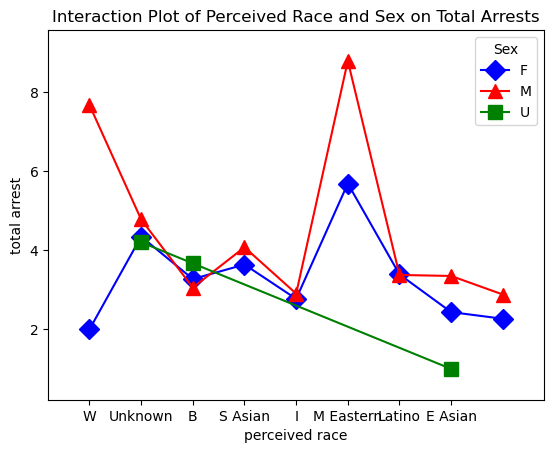

<Figure size 1000x1000 with 0 Axes>

In [29]:
# RQ3 t-test for race and total arrest
#t_stat4, p_value4 = ttest_ind(working_df[working_df["Perceived_Race"] == "Black"]["total_arrest"], working_df[working_df["Perceived_Race"] == "White"]["total_arrest"], equal_var=False)
#print("Welch t-test results for preceived race and total arrest: t = {:.3f}, p = {:.3f}".format(t_stat4, p_value4))

# RQ3 t-test for sex and total arrest
t_stat5, p_value5 = ttest_ind(working_df[working_df["Sex"] == "M"]["total_arrest"], working_df[working_df["Sex"] == "F"]["total_arrest"], equal_var=False)
print("Welch t-test results for sex and total arrest: t = {:.3f}, p = {:.3f}".format(t_stat5, p_value5))
#perform anderson darling test
ad5 = anderson(working_df[working_df["Sex"] == "M"]["total_arrest"])
# Print results
print("statistic:", ad5.statistic)
print("critical values:", ad5.critical_values)
print("significance levels:", ad5.significance_level)
ad6 = anderson(working_df[working_df["Sex"] == "F"]["total_arrest"])
# Print results
print("statistic:", ad6.statistic)
print("critical values:", ad6.critical_values)
print("significance levels:", ad6.significance_level)
test_statistic, p_value = levene(working_df[working_df["Youth_at_arrest__under_18_years"] == "Youth"]["total_arrest"], working_df[working_df["Youth_at_arrest__under_18_years"] == "Adult"]["total_arrest"])
#perform equal variance test
print("Levene test statistic:", test_statistic)
print("p-value:", p_value)


# RQ3 two-way ANOVA
RQ_3_formula = 'total_arrest ~ Sex + Perceived_Race + Perceived_Race:Sex'
# Fit the RQ3 ANOVA model
RQ3_model = ols(RQ_3_formula, data=working_df).fit()
# Print the RQ3 ANOVA table
RQ3_aov_table = sm.stats.anova_lm(RQ3_model, typ=2)
print(RQ3_aov_table)

# RQ3 two way anova post hoc test
mc3 = statsmodels.stats.multicomp.MultiComparison(working_df['total_arrest'],working_df['Sex'])
mc3_results = mc3.tukeyhsd()
print(mc3_results)

# RQ3 Homogeneity of Variance Assumption check
x, pvalue2 = stats.bartlett(working_df['total_arrest'][working_df['Sex']=='M'], working_df['total_arrest'][working_df['Sex']=='F']
                           ,)
print(w, pvalue2)

x1, pvalue3 = stats.bartlett(working_df['total_arrest'][working_df['Perceived_Race']=='Black'], working_df['total_arrest'][working_df['Perceived_Race']=='White'],working_df['total_arrest'][working_df['Perceived_Race']=='Latino'],working_df['total_arrest'][working_df['Perceived_Race']=='Middle-Eastern'],working_df['total_arrest'][working_df['Perceived_Race']=='South Asian'],working_df['total_arrest'][working_df['Perceived_Race']=='East/Southeastern Asian'],working_df['total_arrest'][working_df['Perceived_Race']=='Unknown or Legacy'],working_df['total_arrest'][working_df['Perceived_Race']=='Indigenous'],
                           )
print(x1, pvalue3)

working_df['Race_num'] = pd.Categorical(working_df['Perceived_Race']).codes

# create interaction plot
fig = interaction_plot(x=working_df['Race_num'], 
                       trace=working_df['Sex'],
                       response=working_df['total_arrest'],
                       colors=['blue', 'red', 'green'],
                       markers=['D', '^','s'], 
                       ms=10)
plt.xlabel('perceived race')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7], labels=['W', 'Unknown', 'B', 'S Asian', 'I', 'M Eastern', 'Latino', 'E Asian'])
plt.ylabel('total arrest')
plt.title('Interaction Plot of Perceived Race and Sex on Total Arrests')
plt.figure(figsize= (10,10))
plt.show()